In [35]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [36]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [37]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [38]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [39]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [40]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [47]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station


In [42]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [43]:
# Find the most recent date in the data set.
Latest_Date = session.query(func.max(measurement.date)).first()


('2017-08-23',)

Text(0, 0.5, 'prcp')

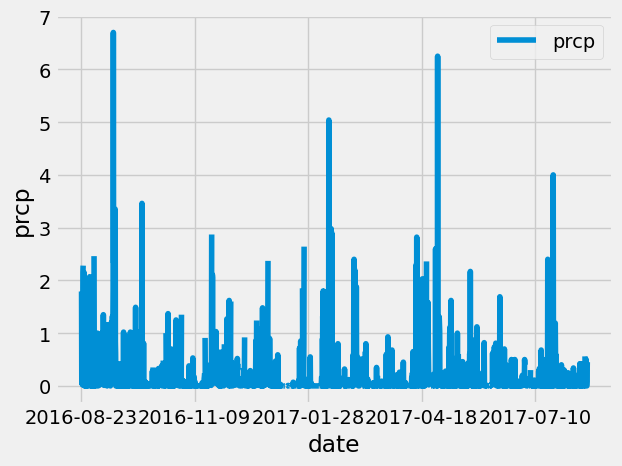

In [44]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
prior_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)


# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores



date_diff = session.query(measurement.date, measurement.prcp).filter(measurement.date >= prior_year).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names

df_results = pd.DataFrame(date_diff)


# Sort the dataframe by date

df_results_sorted = df_results.sort_values("date")


# Use Pandas Plotting with Matplotlib to plot the data

df_results_sorted.plot(x='date', y='prcp')
plt.xlabel("date")
plt.ylabel("prcp")





In [45]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_results_sorted.describe()



,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [48]:
# Design a query to calculate the total number of stations in the dataset

session.query(station.station).distinct().count()


9

In [51]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

Station_Count = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()


Station_Count


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [53]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

Most_Active_Station = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()


Most_Active_Station




[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature')

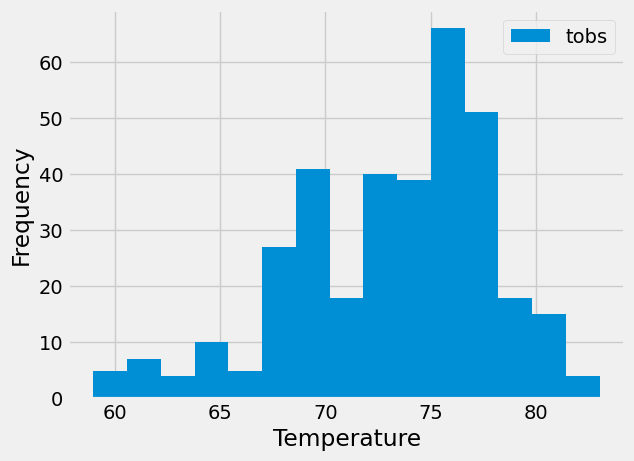

In [56]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

USC00519281_12Months = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date < "2017-08-24").filter(measurement.date > "2016-08-24").all()


USC00519281_12Months


USC00519281_df = pd.DataFrame(USC00519281_12Months)




USC00519281_df


USC00519281_df.plot.hist(bins=15)
plt.xlabel("Temperature")







# Close Session

In [16]:
# Close Session
session.close()